In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
with MPRester ("j1twApjMu9mGh9tITSd6") as m:
    bs = m.get_bandstructure_by_material_id("mp-961649") #BandStructure object

In [23]:
#On détermine la bande interdite
gap = bs.get_band_gap()
if gap['direct'] == False : 
    print ("Bande interdite indirecte d'energie: "+str(gap['energy'])+ " eV" + "\n" + "Transition de la bande interdite: " + str(gap['transition']))
else :
    print ("Bande interdite directe d'energie: "+str(gap['energy'])+ " eV" + "\n" + 'Type de transition de bande : ' + str(gap['transition']))
print('Energie de Fermi : ', bs.efermi)

Bande interdite indirecte d'energie: 1.1292999999999997 eV
Transition de la bande interdite: L-(0.190,0.000,0.190)
Energie de Fermi :  7.22288699


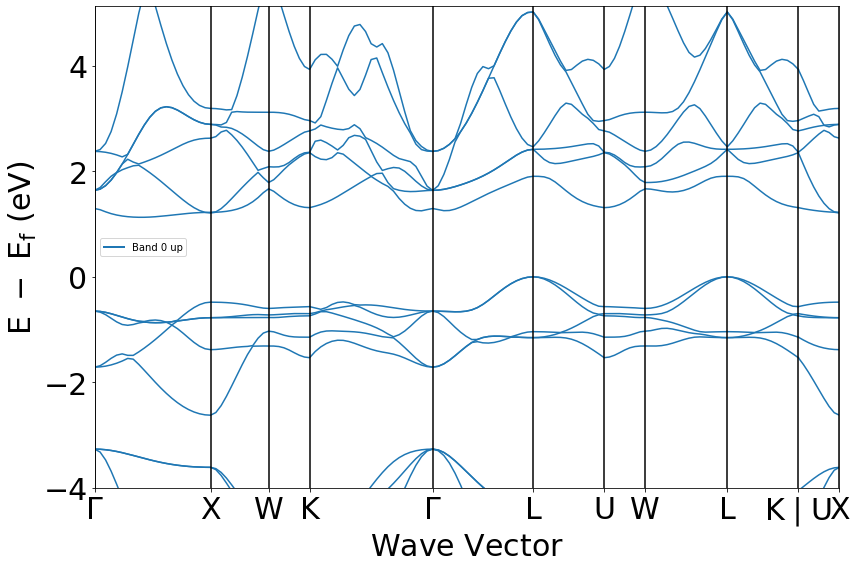

In [24]:
#Figure de bande
plot = BSPlotter(bs)

#Données sur la structure de bande
data = plot.bs_plot_data()
ticks = data.get('ticks')
energy = data.get('energy')
branche = ticks.get('distance')

#Montrer la structure de bande
plot.show()

In [25]:
#On détermine la dernière bande de valence et la première bande de conduction

print("Bande(s) de valence de plus haute énergie: ", bs.get_vbm()['band_index'],'\n')
print("Bande(s) de conduction de plus basse énergie: ", bs.get_cbm()['band_index'],'\n')

Bande(s) de valence de plus haute énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]}) 

Bande(s) de conduction de plus basse énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]}) 



Ce sont les bandes de valence 14 et 15 qui possèdent la plus haute énergie et la bande de conduction 16 qui possède la plus basse énergie. Sur le graphe

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

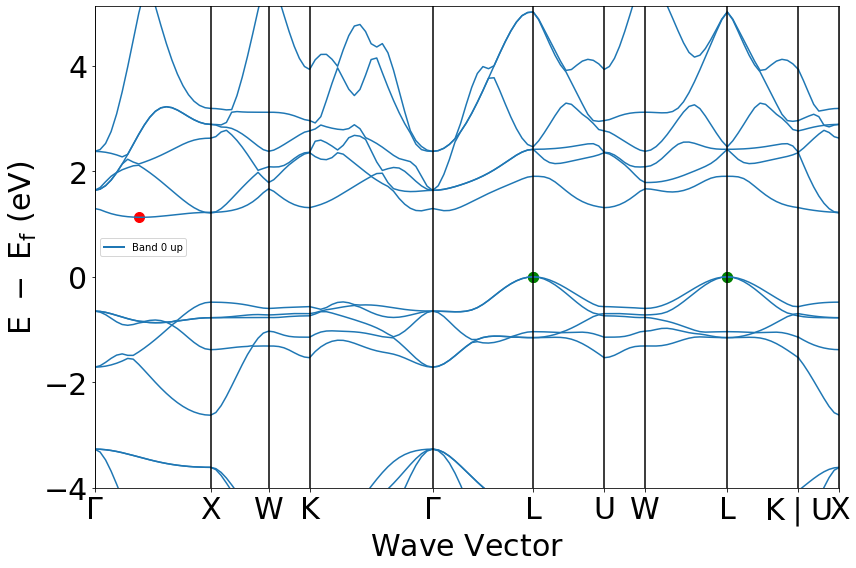

In [26]:
plot.get_plot(vbm_cbm_marker=True)

Pour la bande de valence, la plus grande dispersion se trouve sur le chemin 5 de la bande 14 avec une pente de 1.1117096627895133 et la plus petite dispersion sur le chemin 3 de la bande 14 avec une pente de 2

Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin 2 avec une pente de 0.9834409140230825 et la plus petite dispersion sur le chemin 3 avec une pente de 0.01552704731594663


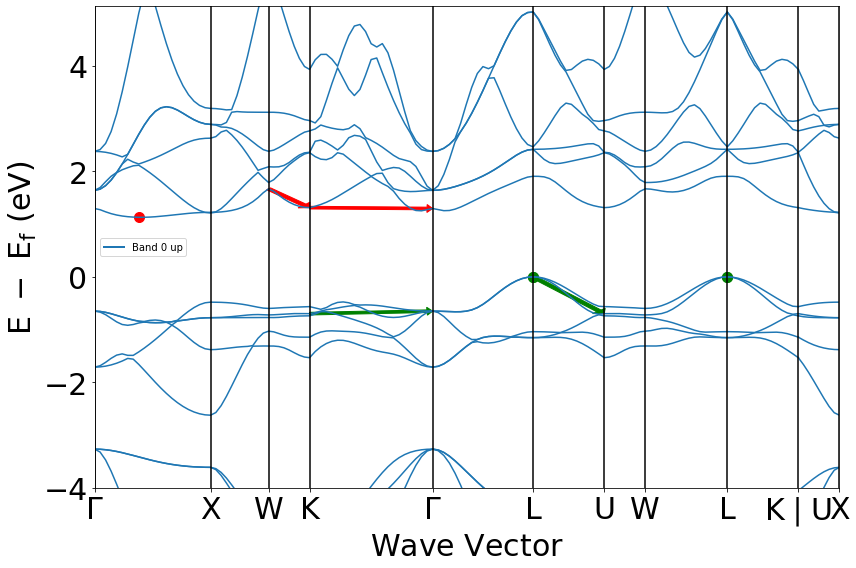

In [42]:
data = plot.bs_plot_data()

distances = data['distances']
energies = data['energy']

dispersionsVal_14 = [] 
dispersionsVal_15 = [] 
dispersionsCond_16 = []

for i in range(len(distances)):
    dispersionsVal_14.append(abs((energies['1'][i][14][0] - energies['1'][i][14][-1])/(distances[i][-1]-distances[i][0])))
    dispersionsVal_15.append(abs((energies['1'][i][15][0] - energies['1'][i][15][-1])/(distances[i][-1]-distances[i][0])))
    dispersionsCond_16.append(abs((energies['1'][i][16][0] - energies['1'][i][16][-1])/(distances[i][-1]-distances[i][0])))
    
max_14 = np.max(dispersionsVal_14)
max_15 = np.max(dispersionsVal_15)
max_16= np.max(dispersionsCond_16)

min_14 = np.min(dispersionsVal_14)
min_15 = np.min(dispersionsVal_15)
min_16 = np.min(dispersionsCond_16)
if min_14 > min_15:
    minv = min_15
    indexmin = 15
    min1 = list(dispersionsVal_15).index(minv)
else :
    minv = min_14
    indexmin = 14
    min1 = list(dispersionsVal_14).index(minv)
    
if max_14 > max_15:
    maxv = max_14
    indexmax = 14
    max1= list(dispersionsVal_14).index(maxv)
else :
    maxv = max_15
    indexmax = 15
    max1= list(dispersionsVal_15).index(maxv)

max2 = list(dispersionsCond_16).index(max_16)
min2 = list(dispersionsCond_16).index(min_16)

print("Pour la bande de valence, la plus grande dispersion se trouve sur le chemin " +str(max1) + " de la bande " + str(indexmax) + " avec une pente de " + str(maxv) + " et la plus petite dispersion sur le chemin " +str(min1)   + " de la bande " + str(indexmin) + " avec une pente de "+ str(max2) + "\n")
print("Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin " +str(max2) + " avec une pente de " + str(max_16) + " et la plus petite dispersion sur le chemin " +str(min2) + " avec une pente de " + str(min_16))

plot.get_plot(vbm_cbm_marker=True)
plt.arrow(distances[min1][0],energies['1'][min1][indexmin][0],distances[min1][-1]-distances[min1][0], energies['1'][min1][indexmin][-1]-energies['1'][min1][indexmin][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "green")
plt.arrow(distances[max1][0],energies['1'][max1][indexmax][0],distances[max1][-1]-distances[max1][0], energies['1'][max1][indexmax][-1]-energies['1'][max1][indexmax][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "green")
plt.arrow(distances[min2][0],energies['1'][min2][16][0],distances[min2][-1]-distances[min2][0], energies['1'][min2][16][-1]-energies['1'][min2][16][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "red")
plt.arrow(distances[max2][0],energies['1'][max2][16][0],distances[max2][-1]-distances[max2][0], energies['1'][max2][16][-1]-energies['1'][max2][16][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "red")
plt.show()


In [56]:
#Déterminer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction


NameError: name 'absc' is not defined